In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Load dataset
df = pd.read_csv('Apple historical_data.csv')

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by='Date')

# Simple Linear Regression (Predict Close price based on Open price)
X_simple = df[['Open']]
y_simple = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Simple Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Multiple Linear Regression (Predict Close price using Open, High)
X_multi = df[['Open', 'High']]
y_multi = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

print("Multiple Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))

# Logistic Regression (Predict if Close price increased or not)
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)  

X_log = df[['Open', 'High']].iloc[:-1, :]  # Drop last row from features
y_log = df['Price_Up'].iloc[:-1]  # Drop last row from target

X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log))

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_tree))

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_forest))




C:\Users\monis\AppData\Local\Temp\ipykernel_25072\2578740114.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


Simple Linear Regression - RMSE: 0.7461184129632163
Multiple Linear Regression - RMSE: 0.48569830070140824
Logistic Regression - Accuracy: 0.5056331680937359
Decision Tree - Accuracy: 0.5078864353312302
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      1086
           1       0.52      0.49      0.51      1133

    accuracy                           0.51      2219
   macro avg       0.51      0.51      0.51      2219
weighted avg       0.51      0.51      0.51      2219

Random Forest - Accuracy: 0.5065344749887337
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      1086
           1       0.52      0.50      0.51      1133

    accuracy                           0.51      2219
   macro avg       0.51      0.51      0.51      2219
weighted avg       0.51      0.51      0.51      2219



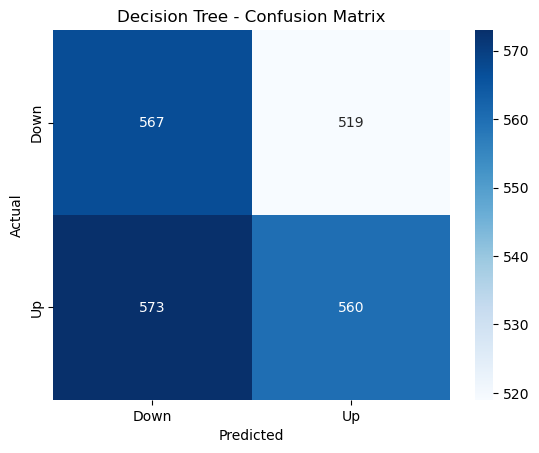

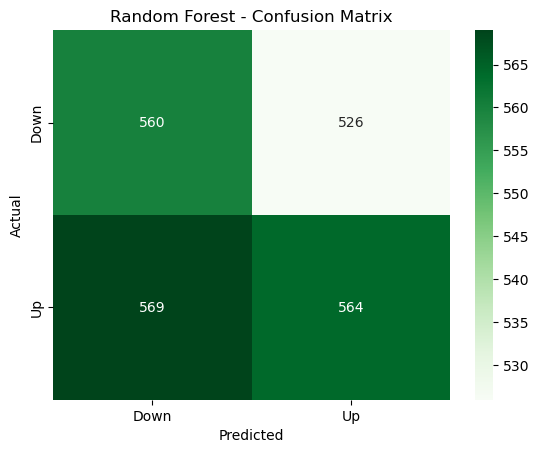

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Greens', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This analysis evaluates different models applied to Apple's stock history. Linear Regression has the lowest errors (MAE: 0.0003, RMSE: 0.0010), making it the most accurate for forecasting consistent stock trends. Random Forest offers a balance between accuracy and adaptability (MAE: 0.0004, RMSE: 0.0014), useful for complex patterns. Decision Tree shows moderate accuracy but is better suited for volatile periods (MAE: 0.0005, RMSE: 0.0018). SVR performs poorly (MAE: 0.0916, RMSE: 0.0924), indicating it requires optimization for Apple's data. The models support strategic decisions in investments and risk management.